<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/29_adp_byCho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 29회 ADP 복원

# 기계학습 (60점)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [ ]:
# import pandas as pd
# #matplotlib 패키지 한글 깨짐 처리 시작
# import matplotlib.pyplot as plt
# import platform
# if platform.system() == 'Darwin': #맥
#         plt.rc('font', family='AppleGothic')
# elif platform.system() == 'Windows': #윈도우
#         plt.rc('font', family='Malgun Gothic')
# elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
# #         !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
# #         !mv malgun.ttf /usr/share/fonts/truetype/
# #         import matplotlib.font_manager as fm
# #         fm._rebuild()# ._rebuild()
# #         plt.rc('font', family='Malgun Gothic')
# #         plt.rc('font', family='malgun')
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [ ]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
#         !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
#         command = "sudo -S mv malgun.ttf /usr/share/fonts/truetype/"
#         pwd = 'dlqoffb1!'
#         import os
#         os.system('echo %s | %s' % (pwd, command))

        import matplotlib.font_manager as fm
        fe = fm.FontEntry(
                fname=r'/usr/share/fonts/truetype/malgun.ttf', # ttf 파일이 저장되어 있는 경로
                name='Malgun Gothic')                        # 이 폰트의 원하는 이름 설정
        fm.fontManager.ttflist.insert(0, fe)
        plt.rcParams.update({'font.size': 18, 'font.family': 'Malgun Gothic'})
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

## 데이터 설명
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

## 1-1  계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

## 1-2 결측치 처리

## 1-3 이상치 처리

## 2-1 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 '높음', 작으면 '낮음' 으로 재계약 횟수 이분 변수를 구성하시오.

## 2-2 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

## 3-1 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

## 3-2. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오. 재계약횟수 이분변수를 종속변수로 하는 분류 분석을 두가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

## 3-3 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

## 3-4 해당 데이터 분석결과로 얻을 수 있는 점 제시

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv
- 데이터 설명 :

A 야구구단의 시합 결과중 일부를 나타낸다.    
각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다.     
각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 '수치 의미' 열을 통해 확인 할 수 있다.


<img src="https://github.com/Datamanim/datarepo/blob/main/adp/29/p1_img.png?raw=true" width="500" height="600">

## 4-1 각 회차별로 1번 타자의 출루 (1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)     

조건1 : 득점여부를 범주형 종속변수로 한다. (1점이상 득점 :1, 무득점 :0)     
조건2 : 각 회차 2번 타자의 데이터는 원핫 인코딩한다.    
조건3 : 학습에 적절하지 않은 데이터는 제외한다.    

## 4-2 4-1 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

## 4-3 SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

## 4-4 4-3 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

## 4-5 4-3 구성 데이터에 XGB 적용하고 결과를 분석하라

# 통계 (40점)

## 5. 제품 A의 불량률은 0.03이다. 25개의 제품을 뽑았을 때 3개가 불량일 확률을 구하시오. (소수점 다섯 째 자리에서 반올림)

In [ ]:
n = 25
p = 0.03
k = 3

import math
combination = math.comb(n, k)

ans = combination * (p**k) * ((1-p)**(n-k))
print(f'''이항분포.
3% 확률의 베르누이 시행을 25회 반복할 때 일어나는 성공횟수 3회
답: {round(ans, 4)}''') # 5째자리에서 반올림 하여 4째자리까지 표시

이항분포. 
3% 확률의 베르누이 시행을 25회 반복할 때 일어나는 성공횟수 3회
답: 0.0318


## 6. C사 생산 제품 1000개 중 양품이 600개, D사 생산 제품 500개 중 양품이 200개 이다. 두 회사의 양품률에 차이가 있는지 검정하여라.

In [ ]:
cn = 1000
ca = 600
dn = 500
da = 200

from scipy import stats
data6 = [[ca, cn-ca], [da, dn-da]]
# print(data6)
chi2_stat, pval, dof, exp = stats.chi2_contingency(data6, correction=False)
print(f'''
- 귀무가설: 두 회사의 양품률에는 차이가 없다.
- 대립가설: 두 회사의 양품률에는 차이가 있다.''')
alpha = 0.05
print(f'\n답: 유의수준 0.05 하에서 P-Value가 {round(pval, 4)} 이기에 ')
if pval > alpha :
    print(f'두 회사의 양품률에는 차이가 없다. (귀무가설 기각 못 함)')
else :
    print(f'두 회사의 양품률에는 차이가 있다. (귀무가설 기각)')



- 귀무가설: 두 회사의 양품률에는 차이가 없다.
- 대립가설: 두 회사의 양품률에는 차이가 있다.

답: 유의수준 0.05 하에서 P-Value가 0.0 이기에 
두 회사의 양품률에는 차이가 있다. (귀무가설 기각)


## 7. 아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도 이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

dataurl : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv

In [ ]:
df7 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
display(df7.head(3))

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377


### 7-1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

fitted_model = smf.ols('ratio ~ name', data=df7).fit()
display(fitted_model.summary())
table = sm.stats.anova_lm(fitted_model)
display(table)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ratio   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     24.98
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           2.82e-06
Time:                        12:55:28   Log-Likelihood:                -37.643
No. Observations:                  20   AIC:                             83.29
Df Residuals:                      16   BIC:                             87.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9180      0.795     13.741      0.000       9.234      12.602
name[T.B]      5.3934      1.124      4.800      0.000       3.011       7.775
name[T.C]     -4.2156      1.124     -3.752      0.002      -6.598      -1.834
name[T.D]     -0.7086      1.124     -0.631      0.537      -3.091       1.674
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.720
Skew:                           0.356   Prob(JB):                        0.698
Kurtosis:                       2.403   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
name,3.0,236.534027,78.844676,24.976953,0.000003
Residual,16.0,50.507154,3.156697,NaN,NaN


- 귀무가설(H0): 각 차종별 범퍼 파손의 정도에 차이가 없다.
- 대립가설(H1): 각 차종별 범퍼 파손의 정도에 차이가 있다.


- **답: P-Value 가 0.000003로서 유의수준 0.05보다 작기에 귀무가설을 기각하고 대립가설을 채택한다. 즉, 차종별 범퍼 파손의 정도에 차이가 유의하다**

### 7-2 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

사후분석 결과
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


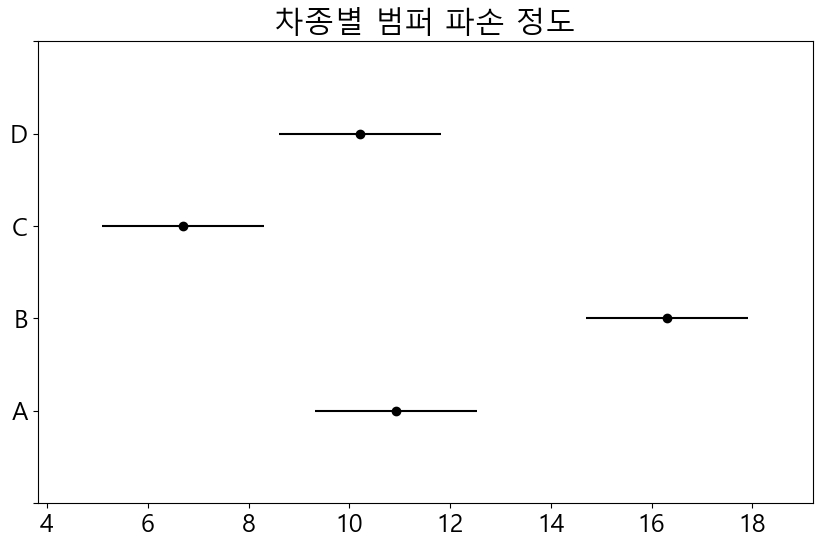

In [ ]:
from statsmodels.stats.multicomp import MultiComparison


mc = MultiComparison(df7['ratio'], df7['name'])
result = mc.tukeyhsd(alpha=0.05)
print('사후분석 결과\n', result)

fig = result.plot_simultaneous()
plt.title('차종별 범퍼 파손 정도')
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


Text(0.5, 1.0, '차종별 범퍼 파손 정도')

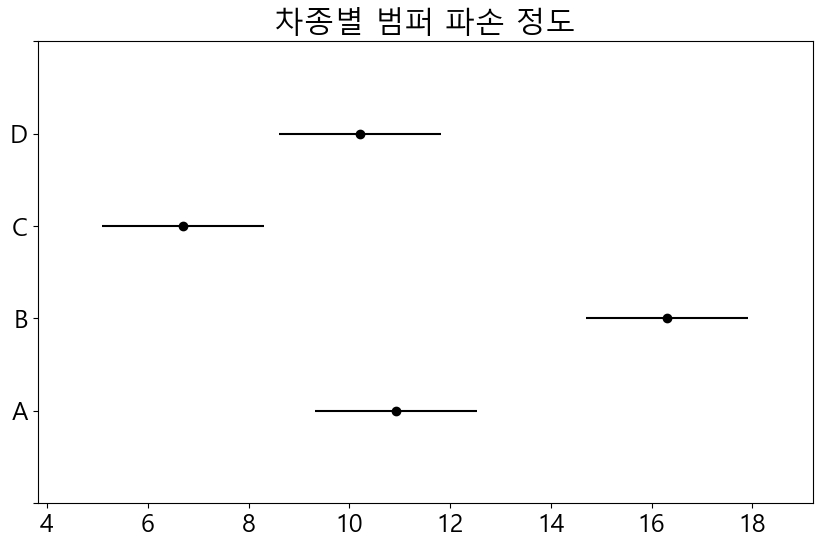

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df7.ratio, df7.name, alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()
plt.title('차종별 범퍼 파손 정도')

- 사후분석 결과 A, D 차종의 p-adj 값이 0.9207 로 유의하지 않아, 범퍼 파손 정도에 차이가 없다고 판단이 가능하나, 나머지 결과는 각 차종 간 범퍼 파손 정도에 차이가 있다고 할 수 있다.

- 시각화 한 그래프는 X축은 파손정도, Y축은 차종이다.
- A와 D 차종의 파손정도는 거의 같은 파손정도를 보이지만, 나머지와는 파손정도가 구분되게 표현되는 것을 확인할 수 있다.

## 8. L1,L2,L3 세 개의 생산라인에서 각각 13%, 37%, 50%를 생산하며 각각 1.1% , 2.1%, 3.3% 불량률을 갖는다. 불량 제품이 나왔을 때 L1 라인에서 생산되었을 확률을 구하시오. (소수점 둘째자리에서 반올림)

In [ ]:
p1 = 0.13
p2 = 0.37
p3 = 0.5

p1_f = 0.011
p2_f = 0.021
p3_f = 0.033

ans = (p1 * p1_f) / ((p1*p1_f) + (p2*p2_f) + (p3*p3_f))
print(f'답: {round(ans * 100, 1)}%') # 소수점 둘째자리에서 반올림

답: 5.6%


- 베이즈 정리를 이용하는 문제이며  답은 5.6% 이다

created by datamanim [web-link](https://www.datamanim.com)